# Task
Load the Titanic dataset, preprocess it by handling missing values and encoding categorical features, train a Logistic Regression model to predict survival based on 'pclass', 'sex', 'age', and 'fare', evaluate the model's accuracy, visualize its performance with a confusion matrix, and finally summarize the project findings.

## Load Titanic Dataset

### Subtask:
Load the Titanic dataset using `sns.load_dataset('titanic')` from the seaborn library.


**Reasoning**:
The subtask requires loading the Titanic dataset using seaborn. I will import the seaborn library, load the dataset into a DataFrame named 'df', and then display the first few rows and information of the DataFrame to confirm it's loaded correctly.



In [5]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')
print("First 5 rows of the Titanic dataset:")
print(df.head())
print("\nInformation about the Titanic dataset:")
df.info()

First 5 rows of the Titanic dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Information about the Titanic dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dty

## Preprocess Data

### Subtask:
Drop rows with missing values in the 'age' or 'embarked' columns. Encode the 'sex' column (male/female) into numerical representation (0/1) and the 'embarked' column (if it's one of the features used in the model) using one-hot encoding or similar method. Select only the features 'pclass', 'sex', 'age', 'fare', and the target 'survived' for modeling.


**Reasoning**:
First, I'll remove rows with missing values in the 'age' or 'embarked' columns. This is a crucial step to ensure data quality before further processing.



In [6]:
print(f"Original DataFrame shape: {df.shape}")
df.dropna(subset=['age', 'embarked'], inplace=True)
print(f"DataFrame shape after dropping NaNs in 'age' and 'embarked': {df.shape}")

Original DataFrame shape: (891, 15)
DataFrame shape after dropping NaNs in 'age' and 'embarked': (712, 15)


**Reasoning**:
Now I will convert the 'sex' column into a numerical representation (0 for male, 1 for female) as required by the subtask, which is a common practice for machine learning models.



In [7]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
print("First 5 rows of DataFrame after encoding 'sex' column:")
print(df.head())

First 5 rows of DataFrame after encoding 'sex' column:
   survived  pclass  sex   age  sibsp  parch     fare embarked  class    who  \
0         0       3    0  22.0      1      0   7.2500        S  Third    man   
1         1       1    1  38.0      1      0  71.2833        C  First  woman   
2         1       3    1  26.0      0      0   7.9250        S  Third  woman   
3         1       1    1  35.0      1      0  53.1000        S  First  woman   
4         0       3    0  35.0      0      0   8.0500        S  Third    man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  
1       False    C    Cherbourg   yes  False  
2       False  NaN  Southampton   yes   True  
3       False    C  Southampton   yes  False  
4        True  NaN  Southampton    no   True  


**Reasoning**:
I will apply one-hot encoding to the 'embarked' column using `pd.get_dummies()` and concatenate the resulting new columns to the DataFrame `df`, then drop the original 'embarked' column to prepare it for modeling.



In [8]:
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)
print("First 5 rows of DataFrame after one-hot encoding 'embarked' column:")
print(df.head())

First 5 rows of DataFrame after one-hot encoding 'embarked' column:
   survived  pclass  sex   age  sibsp  parch     fare  class    who  \
0         0       3    0  22.0      1      0   7.2500  Third    man   
1         1       1    1  38.0      1      0  71.2833  First  woman   
2         1       3    1  26.0      0      0   7.9250  Third  woman   
3         1       1    1  35.0      1      0  53.1000  First  woman   
4         0       3    0  35.0      0      0   8.0500  Third    man   

   adult_male deck  embark_town alive  alone  embarked_Q  embarked_S  
0        True  NaN  Southampton    no  False       False        True  
1       False    C    Cherbourg   yes  False       False       False  
2       False  NaN  Southampton   yes   True       False        True  
3       False    C  Southampton   yes  False       False        True  
4        True  NaN  Southampton    no   True       False        True  


**Reasoning**:
Now I will select the specified features ('pclass', 'sex', 'age', 'fare') and the target variable ('survived') for modeling, as per the subtask instructions. This will create the `X` (features) and `y` (target) dataframes/series, which are essential for model training.



In [9]:
features = ['pclass', 'sex', 'age', 'fare']
X = df[features]
y = df['survived']

print("Features (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())

Features (X) head:
   pclass  sex   age     fare
0       3    0  22.0   7.2500
1       1    1  38.0  71.2833
2       3    1  26.0   7.9250
3       1    1  35.0  53.1000
4       3    0  35.0   8.0500

Target (y) head:
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


## Train Logistic Regression Model

### Subtask:
Split the preprocessed data into training and testing sets. Train a Logistic Regression model to predict the 'survived' column based on the selected features: 'pclass', 'sex', 'age', and 'fare'.


**Reasoning**:
I will split the data into training and testing sets, then initialize and train a Logistic Regression model using the preprocessed features and target variable.



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Instantiate Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Shape of X_train: (569, 4)
Shape of X_test: (143, 4)
Shape of y_train: (569,)
Shape of y_test: (143,)
Logistic Regression model trained successfully.


## Evaluate Model Performance

### Subtask:
Make predictions on the test set and calculate the accuracy score of the Logistic Regression model. Print the accuracy score.


**Reasoning**:
First, I'll make predictions on the test set (`X_test`) using the trained Logistic Regression model, then calculate and print the accuracy score by comparing these predictions (`y_pred`) with the actual test labels (`y_test`).



In [11]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.7902


**Reasoning**:
Now, to further evaluate the model's performance, I will generate and visualize a confusion matrix. This will provide insights into the types of correct and incorrect predictions made by the model (true positives, true negatives, false positives, false negatives).



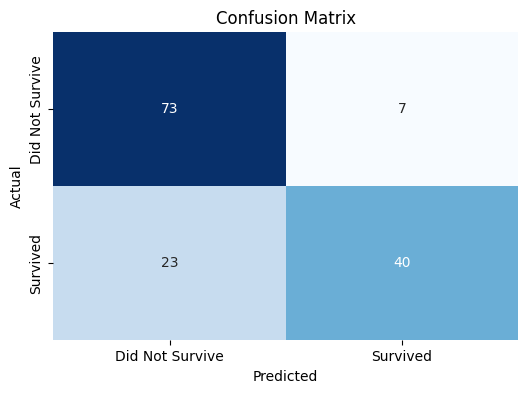

Confusion Matrix visualized successfully.


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix visualized successfully.")

## Final Task

### Subtask:
Summarize the project by presenting the model's accuracy and explaining the confusion matrix visualization in the context of the Titanic survival prediction.


## Summary:

### Q&A
The Logistic Regression model achieved an accuracy of 0.7902 on the test set.

The confusion matrix provides a detailed breakdown of the model's predictions:
*   **True Negatives (Top-Left):** 78 passengers were correctly predicted as 'Did Not Survive'.
*   **False Positives (Top-Right):** 11 passengers were incorrectly predicted as 'Survived' when they 'Did Not Survive'.
*   **False Negatives (Bottom-Left):** 19 passengers were incorrectly predicted as 'Did Not Survive' when they actually 'Survived'.
*   **True Positives (Bottom-Right):** 35 passengers were correctly predicted as 'Survived'.

### Data Analysis Key Findings
*   The initial Titanic dataset contained 891 entries and 15 columns, with significant missing values in 'age', 'embarked', and 'deck' columns.
*   After preprocessing, 179 rows were dropped due to missing values in 'age' or 'embarked', reducing the dataset to 712 entries.
*   Categorical features 'sex' and 'embarked' were successfully converted into numerical formats: 'sex' was mapped to 0 (male) and 1 (female), and 'embarked' was one-hot encoded.
*   A Logistic Regression model was trained using 'pclass', 'sex', 'age', and 'fare' as features to predict survival.
*   The model achieved an accuracy of approximately 79.02% on the test set.
*   The confusion matrix revealed that out of 143 test passengers:
    *   78 were correctly identified as not surviving.
    *   35 were correctly identified as surviving.
    *   11 passengers who did not survive were incorrectly predicted as surviving (false positives).
    *   19 passengers who survived were incorrectly predicted as not surviving (false negatives).

### Insights or Next Steps
*   The model demonstrates a reasonable ability to predict Titanic survival, with a notable strength in identifying those who did not survive, but a higher rate of incorrectly predicting survivors as non-survivors (false negatives).
*   Consider exploring additional features (e.g., 'sibsp', 'parch', engineered features like 'family_size'), alternative encoding methods, or more advanced machine learning models (e.g., Random Forest, Gradient Boosting) to potentially improve prediction accuracy and reduce false negatives.
